<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-31-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-30,1761025,97880,24454.0,989.0
2020-05-31,1783570,98536,22545.0,656.0
2020-06-01,1799761,99005,16191.0,469.0


In [7]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-28,101697,3973,2717.0,89.0
2020-05-29,103886,4068,2189.0,95.0
2020-05-30,106878,4156,2992.0,88.0
2020-05-31,110583,4213,3705.0,57.0
2020-06-01,113006,4251,2423.0,38.0


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1799761
Total deaths = 99005


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
NY,371711,1742066,0,3331.0,89703.0,999.0,0.0,746.0,0.0,66110.0,A,6/1/2020 00:00,b62a8d3f522d082095890588a7c32fb896050273,2020-06-01T20:00:00Z,23959,89703.0,2113777,2113777,2113777,36,54.0,113.0,49011.0,941.0,49952.0
NJ,160918,634682,0,2466.0,17222.0,646.0,0.0,459.0,0.0,26703.0,A+,6/1/2020 13:00,ab4b3caca862a0a89bb53be1c9d9925af4b43ec9,2020-06-01T20:00:00Z,11721,17222.0,795600,795600,795600,34,23.0,25.0,48982.0,473.0,49455.0
IL,121234,797039,0,3215.0,0.0,902.0,0.0,547.0,0.0,0.0,A,6/1/2020 00:59,50cc25be4af1b7b3adb32ad8db52fef4a3d944d6,2020-06-01T20:00:00Z,5412,0.0,918273,918273,918273,17,22.0,0.0,19040.0,974.0,20014.0
CA,113006,1899577,0,4258.0,0.0,1273.0,0.0,0.0,0.0,0.0,B,6/1/2020 00:00,cf9e02587b3f834a9bef9dc822bb7e1b49bd8de9,2020-06-01T20:00:00Z,4251,0.0,2012583,2012583,2012583,06,38.0,0.0,65312.0,2423.0,67735.0
MA,96965,495888,0,1824.0,9823.0,436.0,0.0,0.0,0.0,0.0,A,5/31/2020 10:00,02a3b6994a8b60bb47efb26e9696fa9b77009ee9,2020-06-01T20:00:00Z,6846,9823.0,592853,592853,592853,25,0.0,0.0,0.0,0.0,0.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
125,2020-05-26,1671035,14907041,93093,16206.0,629.0,0.928476
126,2020-05-27,1689630,15192481,94352,18595.0,1259.0,0.938808
127,2020-05-28,1712637,15607239,95705,23007.0,1353.0,0.951591
128,2020-05-29,1736571,16099515,96891,23934.0,1186.0,0.964890
129,2020-05-30,1761025,16530685,97880,24454.0,989.0,0.978477
130,2020-05-31,1783570,16936891,98536,22545.0,656.0,0.991004
131,2020-06-01,1799761,17340682,99005,16191.0,469.0,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
83,2020-05-26,96733,1696396,3814,2175.0,19.0,0.855999
84,2020-05-27,98980,1736894,3884,2247.0,70.0,0.875883
85,2020-05-28,101697,1790559,3973,2717.0,89.0,0.899926
86,2020-05-29,103886,1835478,4068,2189.0,95.0,0.919296
87,2020-05-30,106878,1888595,4156,2992.0,88.0,0.945773
88,2020-05-31,110583,1944848,4213,3705.0,57.0,0.978559
89,2020-06-01,113006,2012583,4251,2423.0,38.0,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-28,1712637,13894602,1906,36967.0,205974.0,8389.0,8109.0,4080.0,676.0,399991.0,95705,205974.0,15609145,15607239,15607239,1353.0,2500.0,391751.0,23007.0,414758.0
2020-05-29,1736571,14362944,2978,35871.0,207694.0,8175.0,8235.0,4032.0,689.0,406446.0,96891,207694.0,16102493,16099515,16099515,1186.0,1720.0,468342.0,23934.0,492276.0
2020-05-30,1761025,14769660,1668,34650.0,209134.0,7956.0,8305.0,4004.0,698.0,416461.0,97880,209134.0,16532353,16530685,16530685,989.0,1440.0,406716.0,24454.0,431170.0
2020-05-31,1783570,15153321,3270,33840.0,210083.0,7623.0,8445.0,3669.0,704.0,444758.0,98536,210083.0,16940161,16936891,16936891,656.0,949.0,383661.0,22545.0,406206.0
2020-06-01,1799761,15540921,3455,33237.0,212704.0,7620.0,8485.0,3661.0,704.0,458231.0,99005,212704.0,17344137,17340682,17340682,469.0,2621.0,387600.0,16191.0,403791.0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-28,101697,1688862,0,4529.0,0.0,1325.0,0.0,0.0,0.0,0.0,3973,0.0,1790559,1790559,1790559,89.0,0.0,50948.0,2717.0,53665.0
2020-05-29,103886,1731592,0,4414.0,0.0,1328.0,0.0,0.0,0.0,0.0,4068,0.0,1835478,1835478,1835478,95.0,0.0,42730.0,2189.0,44919.0
2020-05-30,106878,1781717,0,4215.0,0.0,1273.0,0.0,0.0,0.0,0.0,4156,0.0,1888595,1888595,1888595,88.0,0.0,50125.0,2992.0,53117.0
2020-05-31,110583,1834265,0,4331.0,0.0,1324.0,0.0,0.0,0.0,0.0,4213,0.0,1944848,1944848,1944848,57.0,0.0,52548.0,3705.0,56253.0
2020-06-01,113006,1899577,0,4258.0,0.0,1273.0,0.0,0.0,0.0,0.0,4251,0.0,2012583,2012583,2012583,38.0,0.0,65312.0,2423.0,67735.0


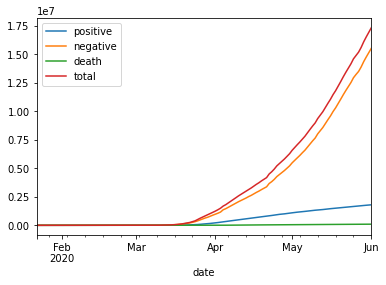

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

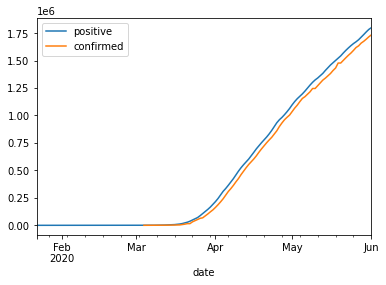

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1790172
dead          104381
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    111951
dead           4172
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-06-01 02:32:46,34.223334,-82.461707,42,0,0,42,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-06-01 02:32:46,30.295065,-92.414197,418,23,0,395,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-06-01 02:32:46,37.767072,-75.632346,909,12,0,897,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-06-01 02:32:46,43.452658,-116.241552,812,22,0,790,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-06-01 02:32:46,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1790172
Brazil             514849
Russia             405843
United Kingdom     276156
Spain              239479
Italy              232997
India              190609
France             189009
Germany            183410
Peru               164476
Name: confirmed, dtype: int64

In [21]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,467,53723,0,10.0,0.0,0.0,0.0,1.0,0.0,368.0,A,6/1/2020 00:00,bfa7ba8bf9bfdb72ce8db9a6131486b609c78e9a,2020-06-01T20:00:00Z,10,0.0,54190,54190,54190,02,0.0,0.0,2462.0,33.0,2495.0
AL,18363,205160,0,0.0,1856.0,0.0,591.0,0.0,355.0,9355.0,B,6/1/2020 00:00,e5cf4b205b69e3119189967b94f0f5bcc34d0881,2020-06-01T20:00:00Z,646,1856.0,223523,223523,223523,01,15.0,12.0,5510.0,460.0,5970.0
AR,7443,125793,0,115.0,711.0,0.0,0.0,27.0,123.0,5401.0,A,6/1/2020 00:00,42779e9a1750a8543bc9d65c443f43a504d5f0fc,2020-06-01T20:00:00Z,133,711.0,133236,133236,133236,05,0.0,0.0,3531.0,190.0,3721.0
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/29/2020 00:00,33014318c91453b05c8fe07b747ad7e59da87be4,2020-06-01T20:00:00Z,0,0.0,174,174,174,60,0.0,0.0,0.0,0.0,0.0
AZ,20123,207947,0,968.0,3018.0,377.0,0.0,238.0,0.0,4869.0,A+,6/1/2020 00:00,59e11827e442ed6c502da251ab07e208b5501316,2020-06-01T20:00:00Z,917,3018.0,228070,228070,228070,04,11.0,20.0,2677.0,187.0,2864.0


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [24]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-06-01,56830,2543,56830,1.000000
FL,2020-05-31,56163,2534,56830,0.988263
FL,2020-05-30,55424,2530,56830,0.975260
FL,2020-05-29,54497,2495,56830,0.958948
FL,2020-05-28,53285,2446,56830,0.937621
FL,2020-05-27,52634,2400,56830,0.926166
FL,2020-05-26,52255,2338,56830,0.919497


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

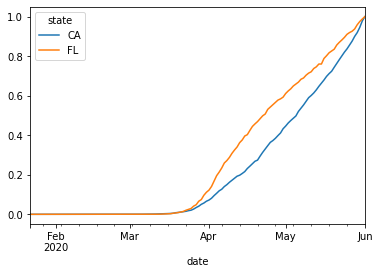

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

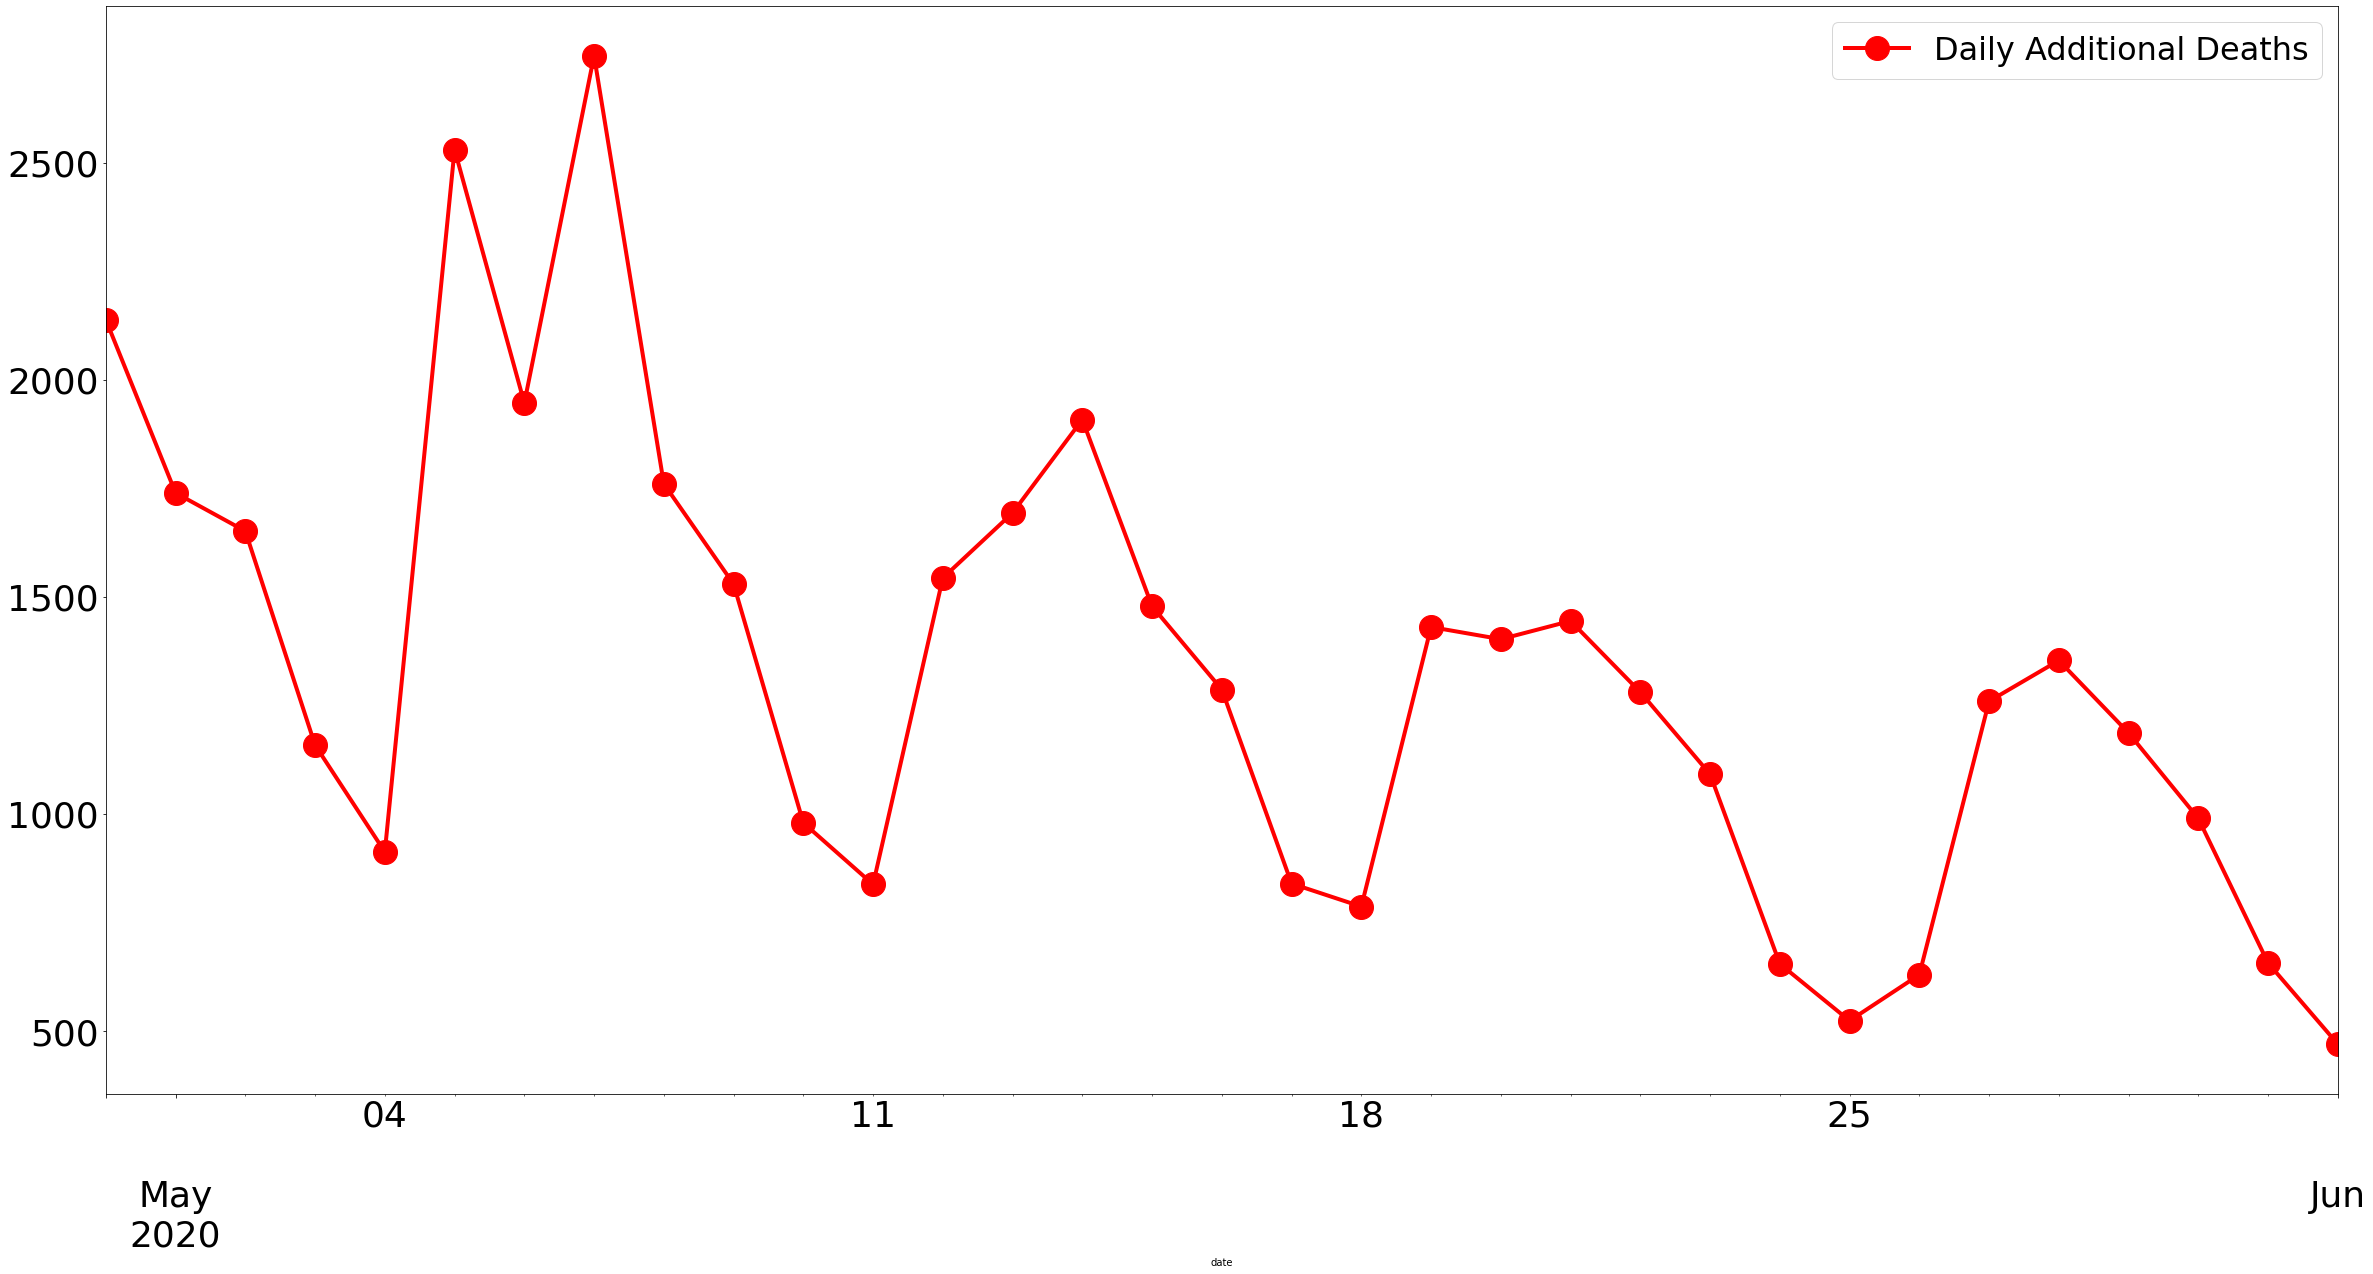

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


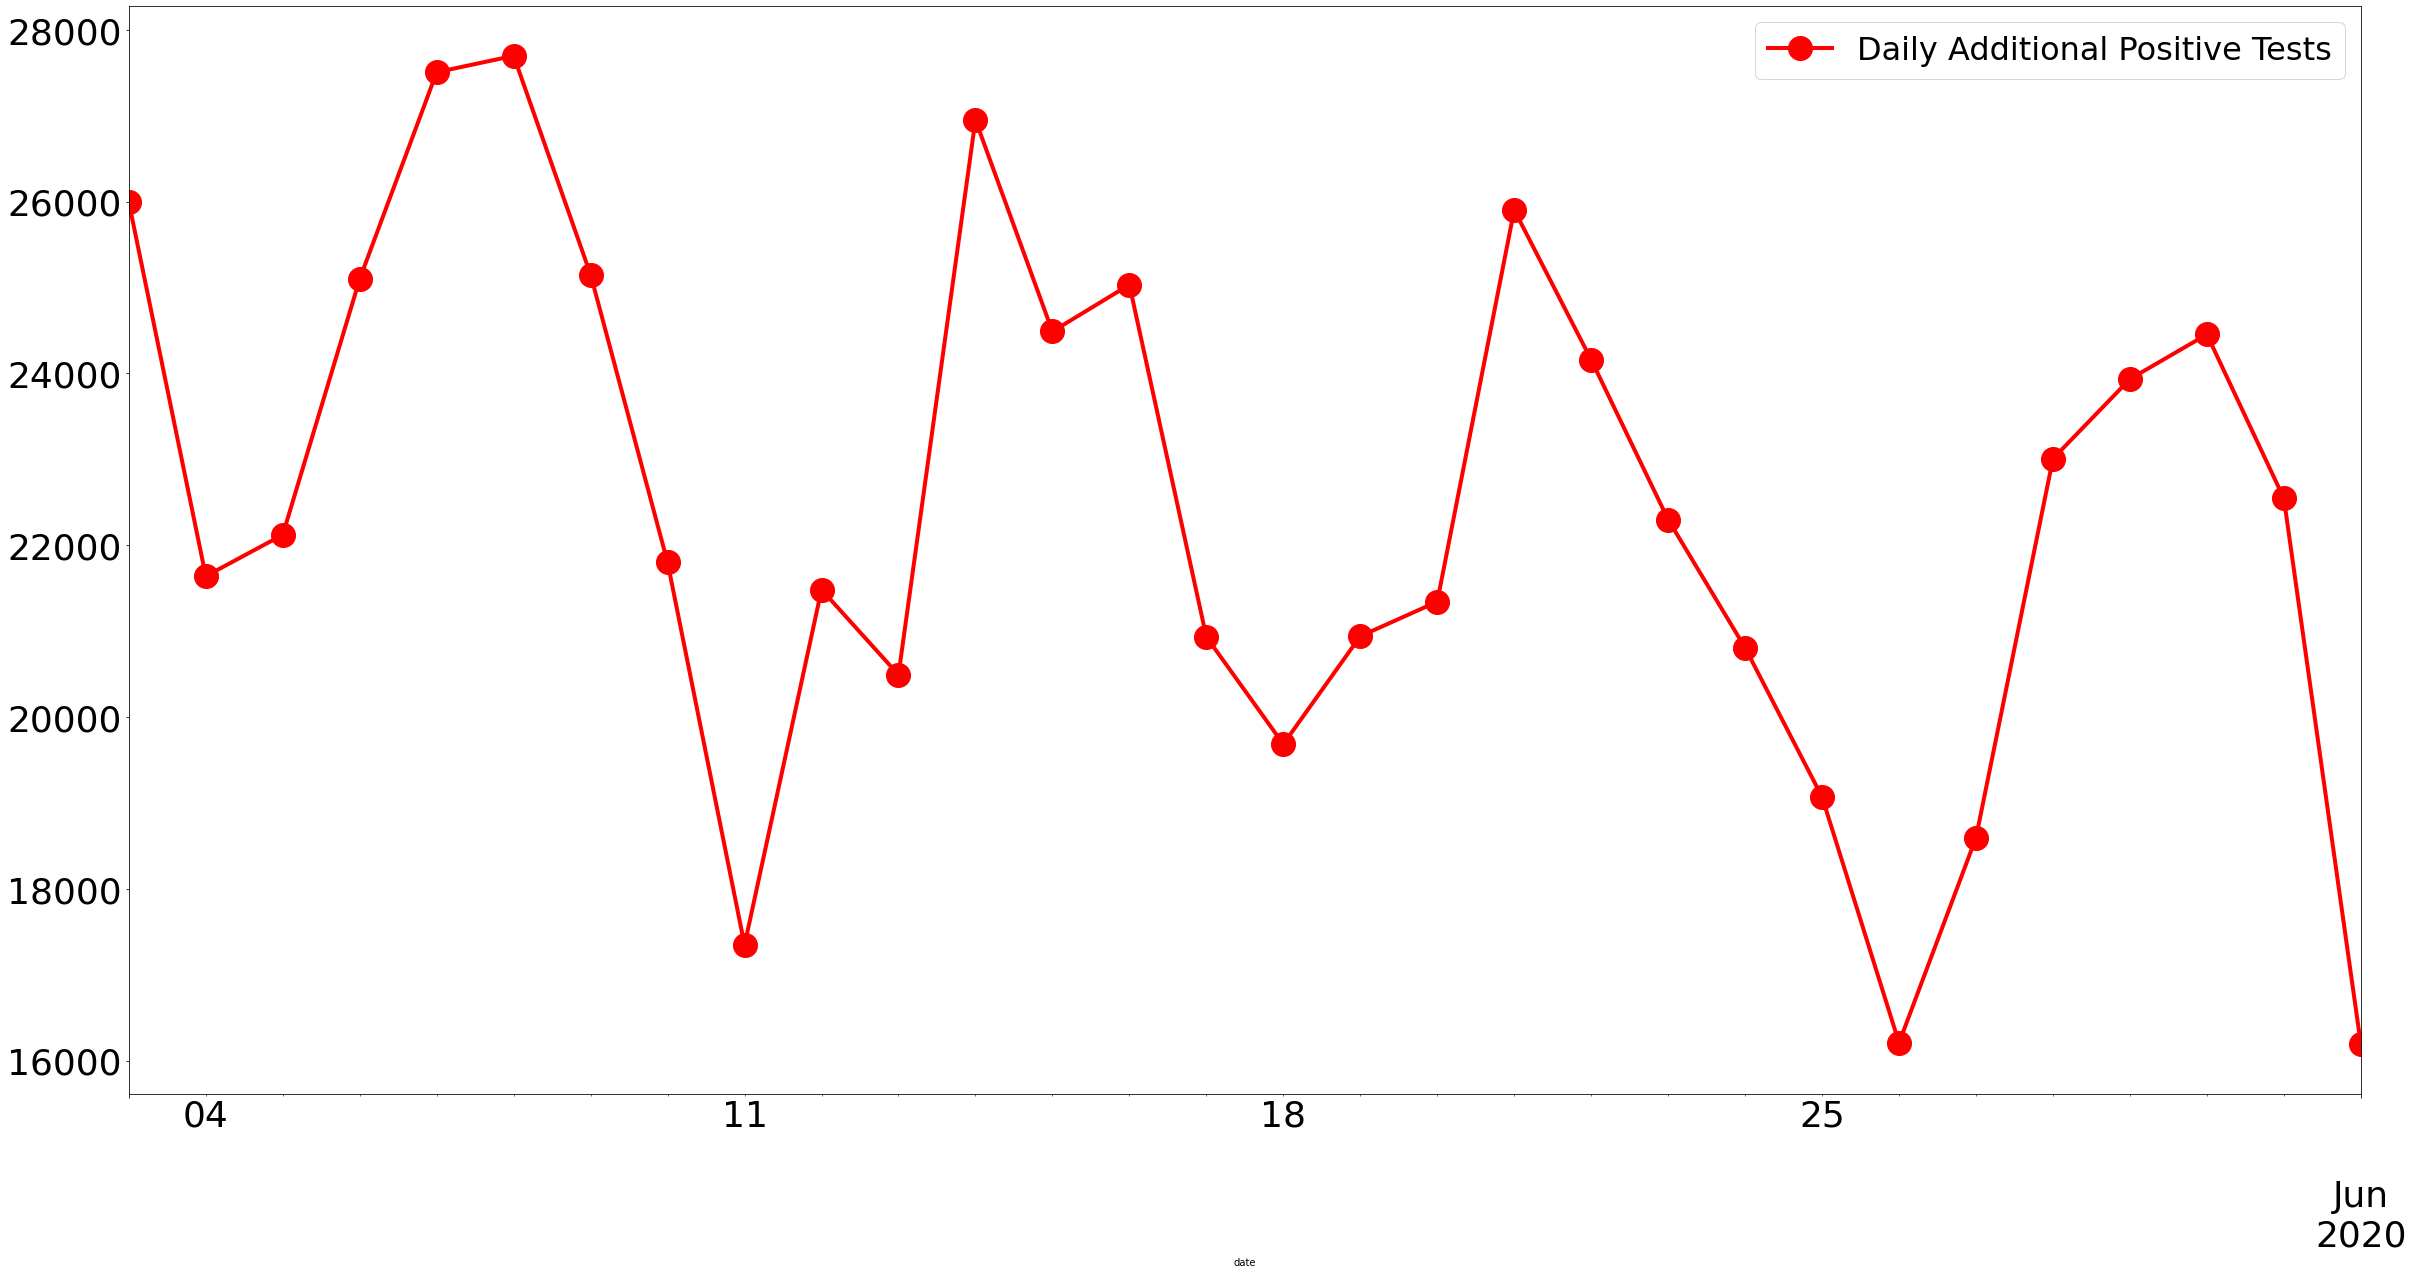

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


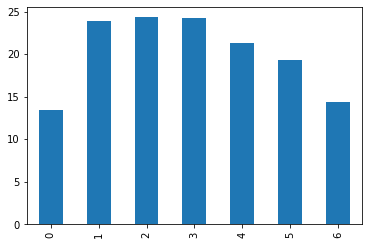

In [31]:
dfDoW.mean().deathIncrease.plot.bar()



In [32]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202017,12864.0,18512.0,1319356.0,209064.0,1528420.0
202018,12704.0,24872.0,1462961.0,191865.0,1654826.0
202019,12402.0,18998.0,1747407.0,171010.0,1909104.0
202020,9584.0,12129.0,2324282.0,156723.0,2481005.0
202021,8087.0,15648.0,2548088.0,155132.0,2703220.0
202022,6595.0,26480.0,2625387.0,147810.0,2773197.0
202023,469.0,2621.0,387600.0,16191.0,403791.0


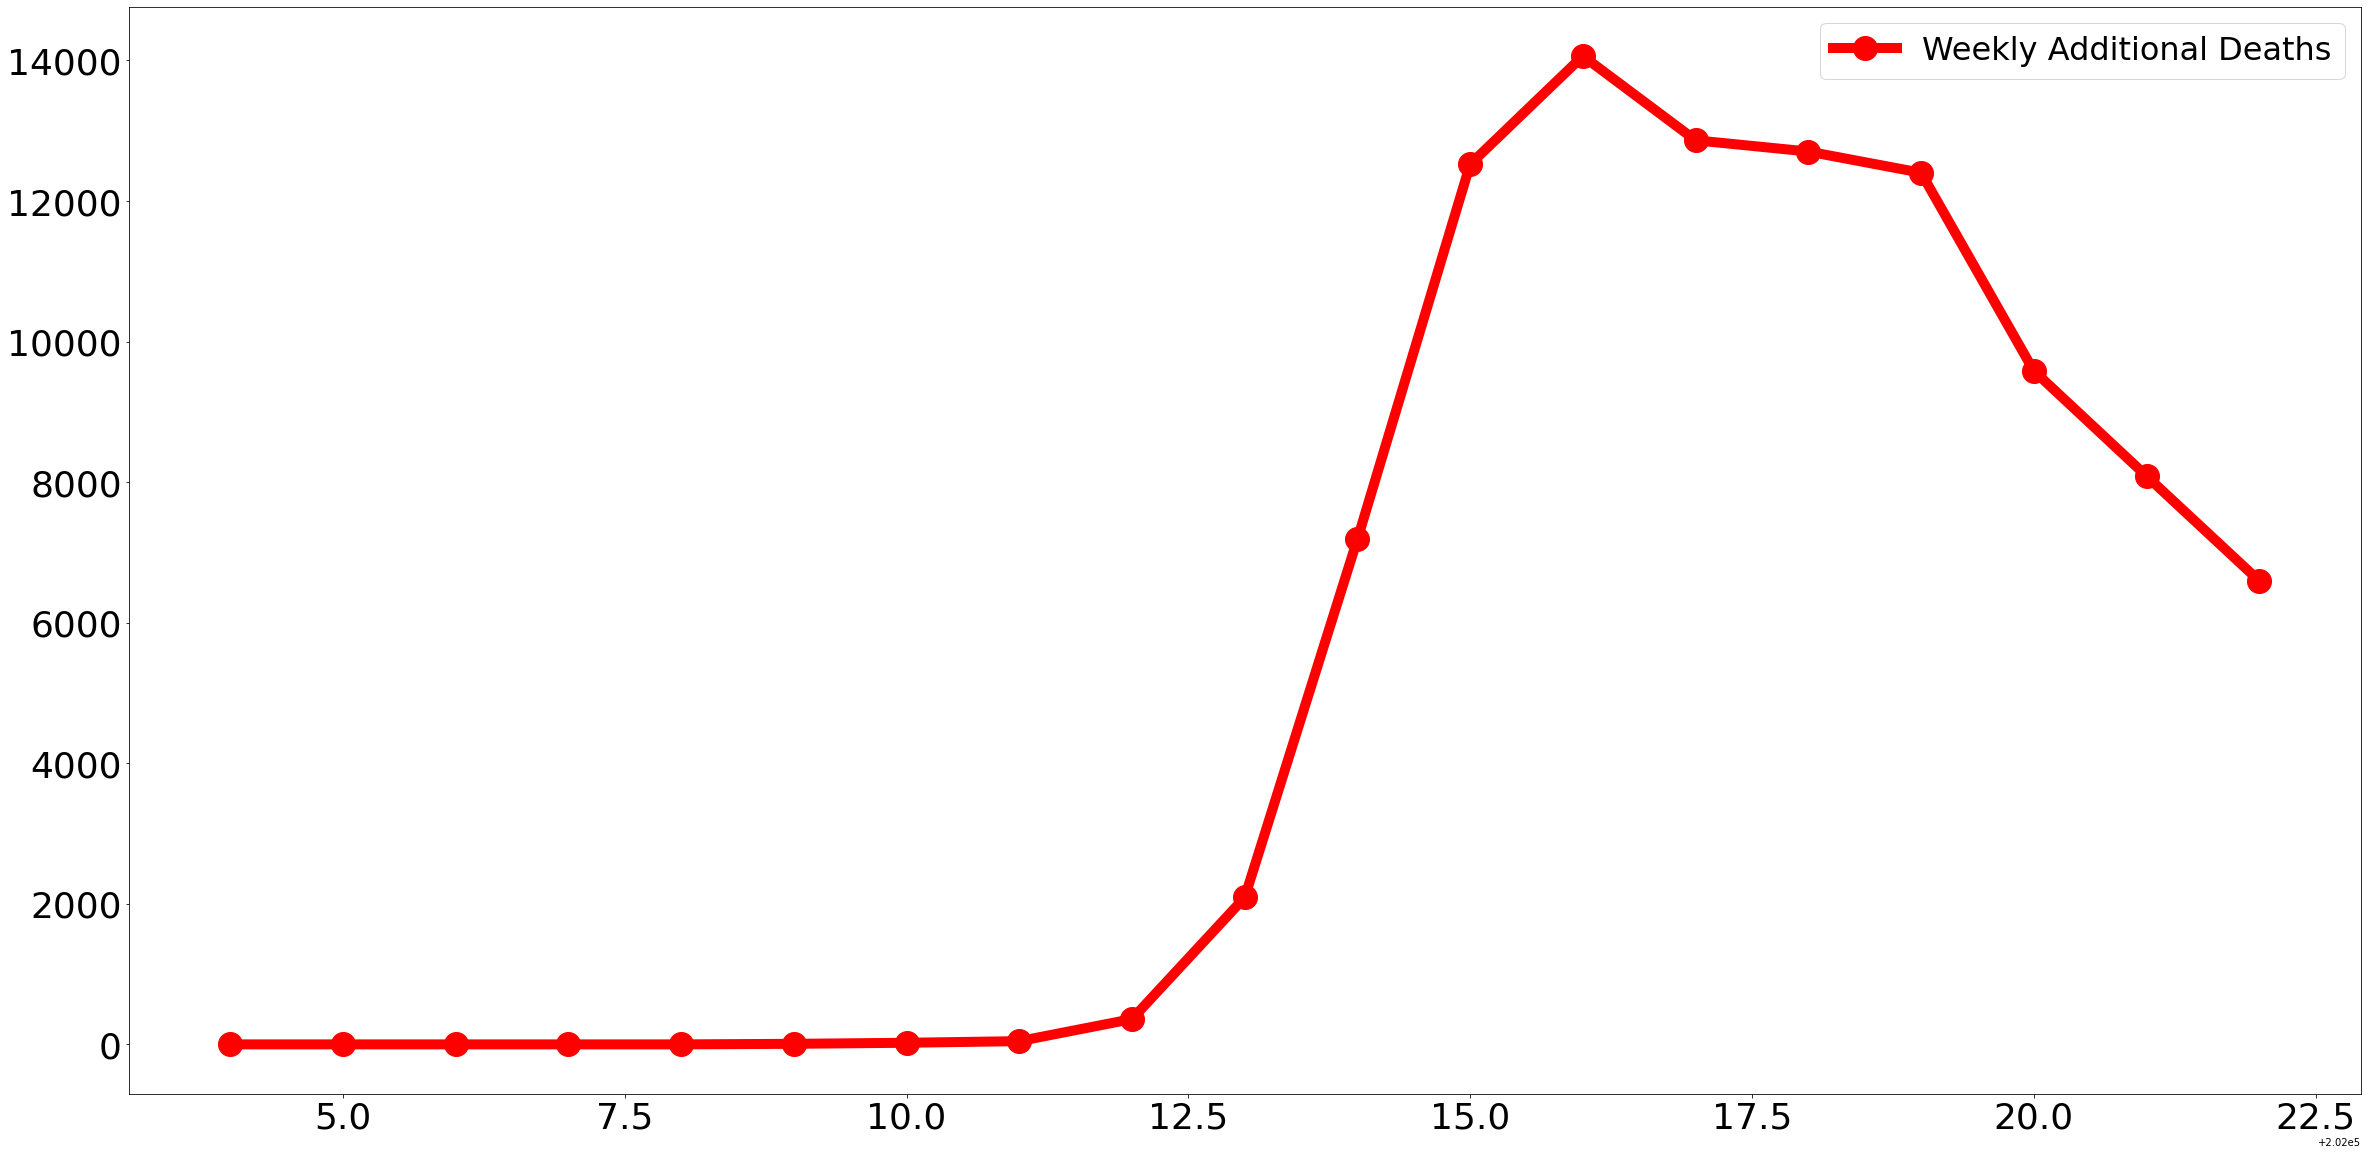

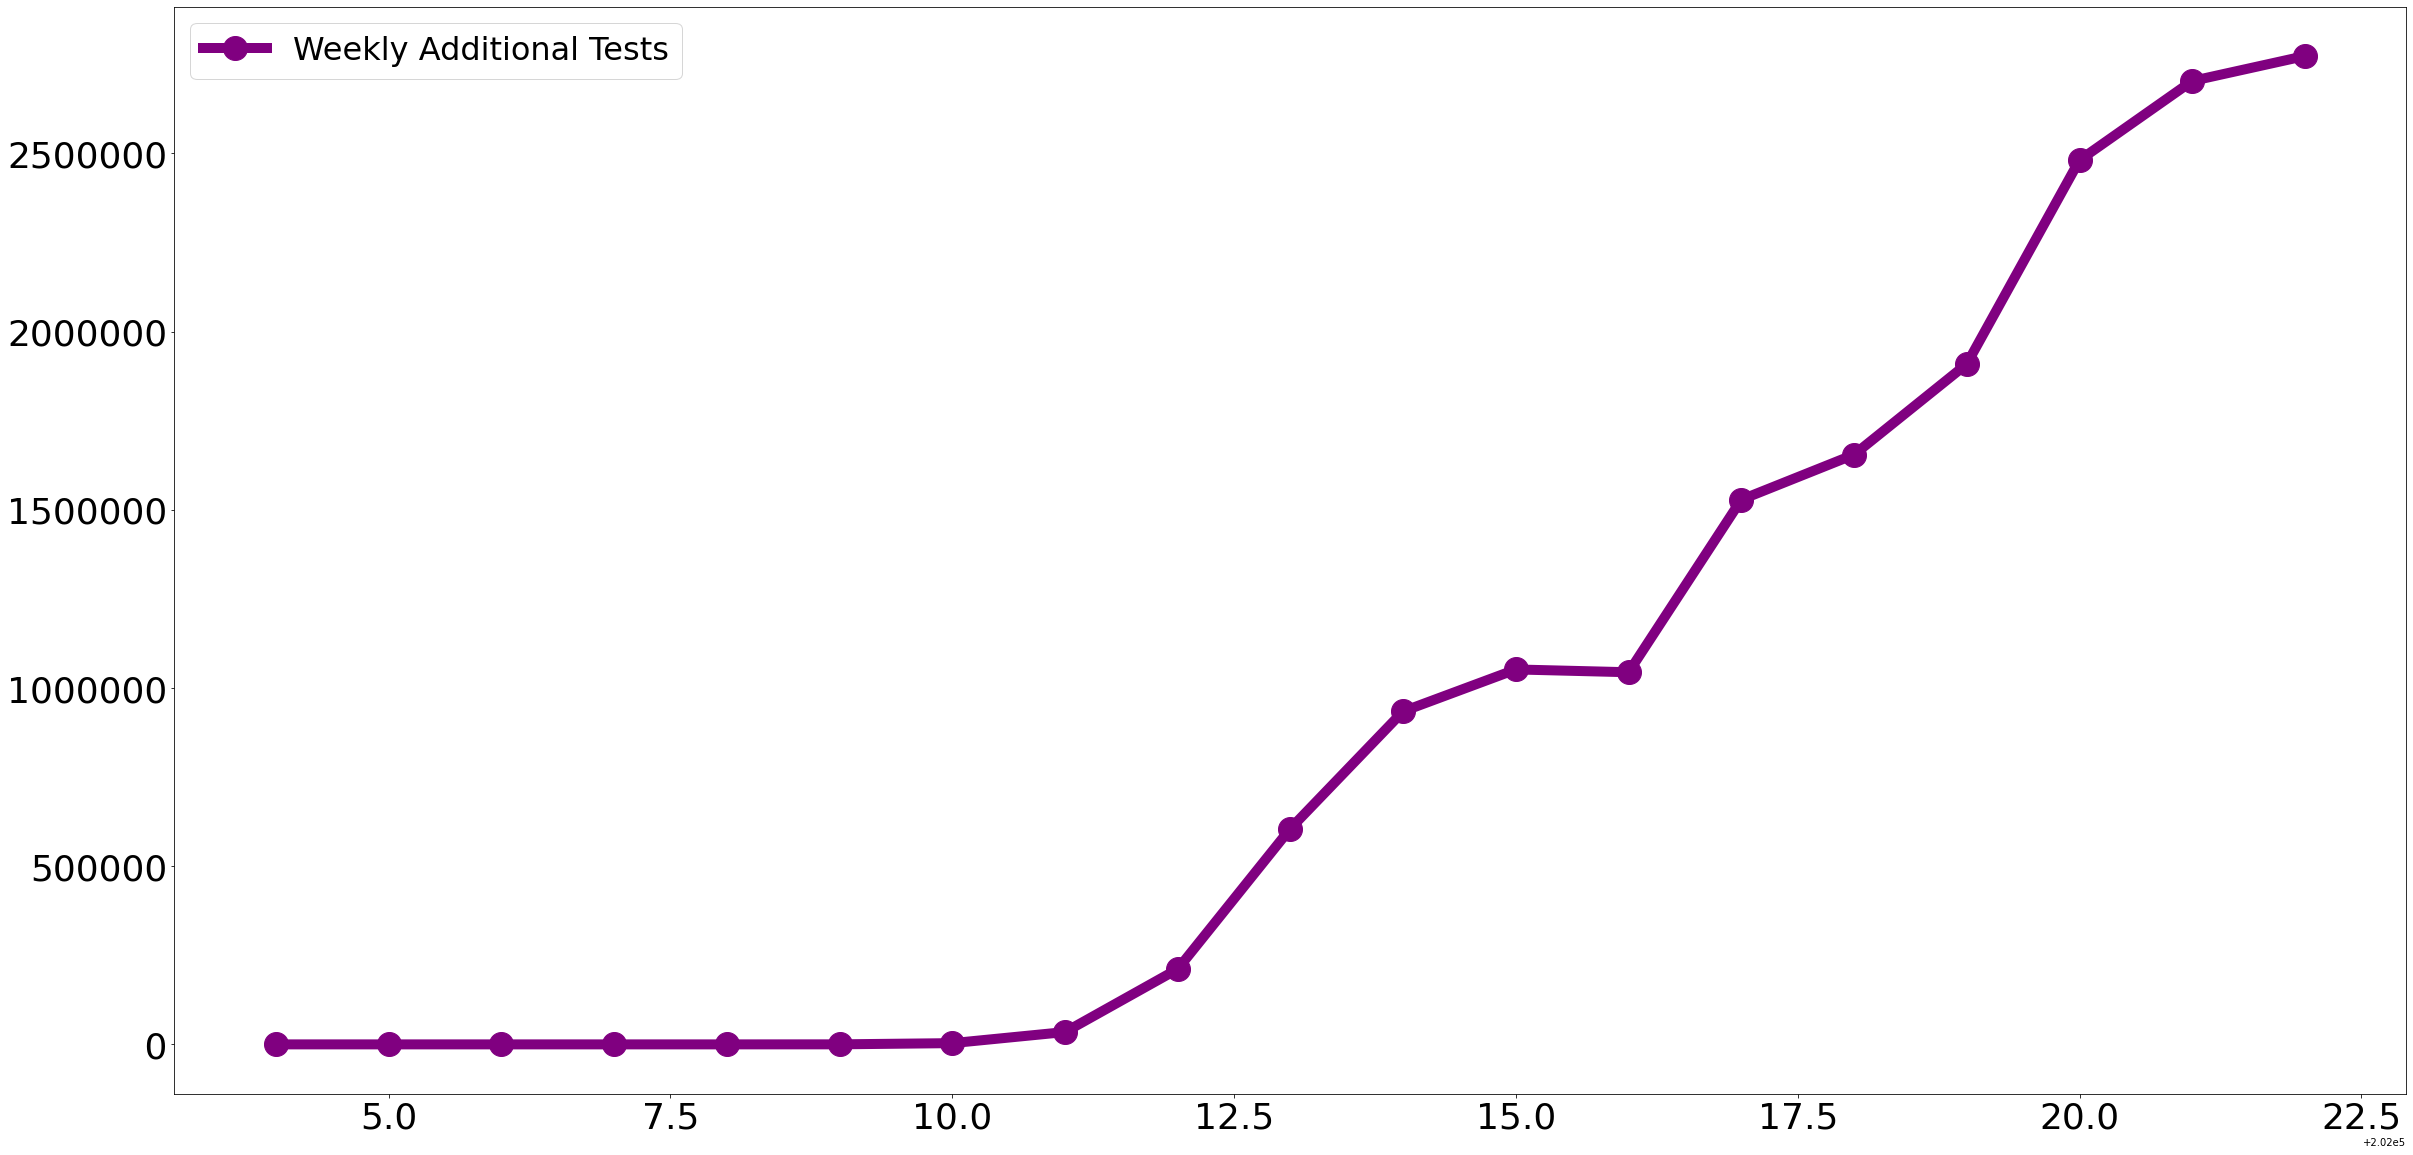

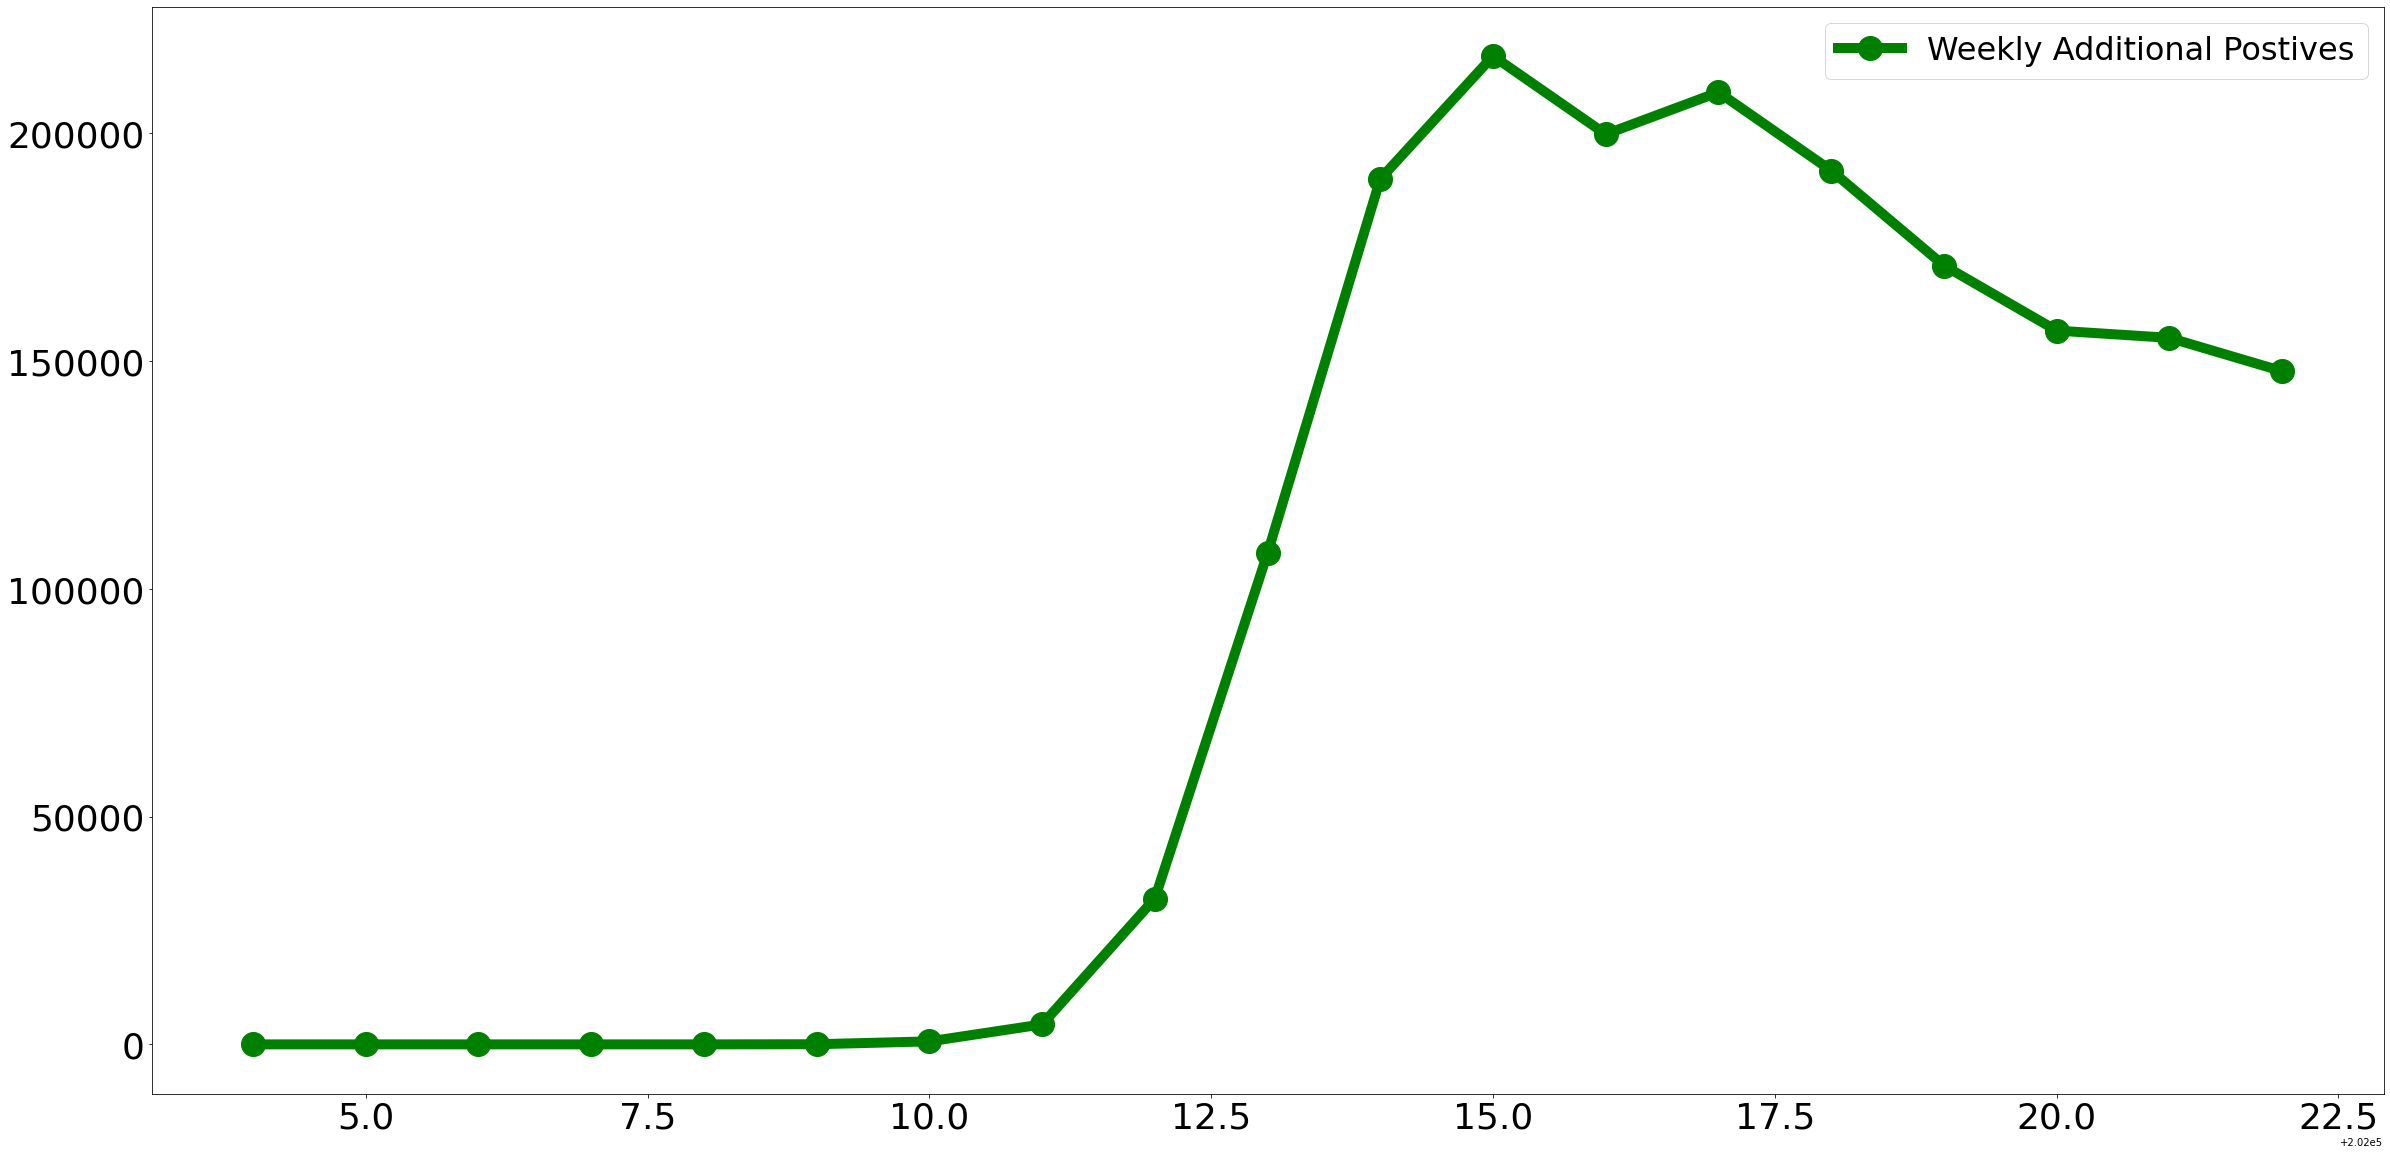

In [33]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

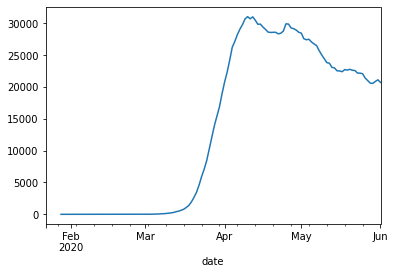

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

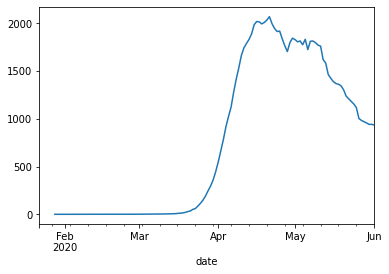

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

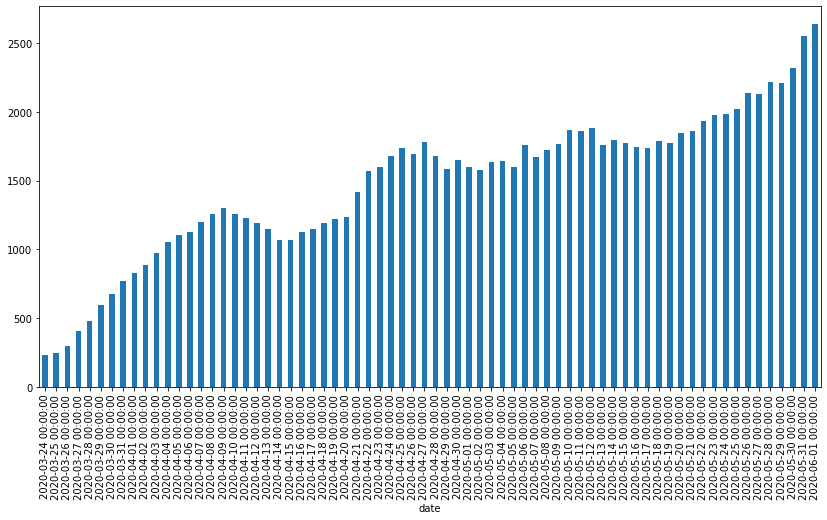

In [37]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


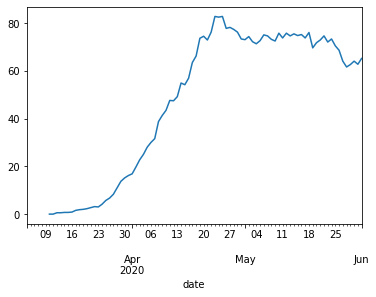

In [38]:
dfCAAvg.deathIncrease.plot.line()

In [39]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
88,AL,2020-06-01,18363,646,18363,1.000000
89,AL,2020-05-31,17903,631,18363,0.974950
90,AL,2020-05-30,17359,618,18363,0.945325
91,AL,2020-05-29,16823,605,18363,0.916136
92,AL,2020-05-28,16310,590,18363,0.888199
93,AL,2020-05-27,15843,581,18363,0.862768
94,AL,2020-05-26,15396,575,18363,0.838425
95,AL,2020-05-25,14730,562,18363,0.802157
96,AL,2020-05-24,14327,551,18363,0.780210
97,AL,2020-05-23,13938,546,18363,0.759026


In [40]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=14)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
189,AR,2020-05-18,4813,100,7443,0.646648
2200,MN,2020-05-18,16372,740,25208,0.649476
2627,NC,2020-05-18,19023,661,29263,0.650070
102,AL,2020-05-18,12086,489,18363,0.658171
4694,WI,2020-05-18,12687,459,18543,0.684193
4307,VA,2020-05-18,31140,1014,45398,0.685933
3693,PR,2020-05-18,2710,124,3873,0.699716
355,AZ,2020-05-18,14170,686,20123,0.704169
445,CA,2020-05-18,80430,3302,113006,0.711732
2453,MS,2020-05-18,11432,528,15752,0.725749


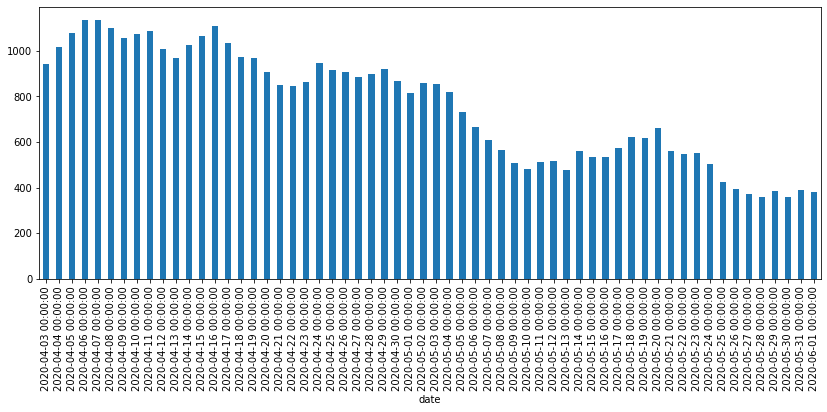

In [41]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('MI')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [42]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


In [43]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [46]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1799761
negative    15540921
pending         3455
death          99005
total       17344137
dtype: int64
Current Infection Rate 10.376769%
Percentage of US affected: 0.578470%
Observed CFR: 5.501008%
Percentage of US tested/affected: 5.313098%
Projected affected by cir = 34,060,657
Projected killed = 1,873,680


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [54]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.910761,10.865759
NJ,1.811693,8.957250
RI,1.415098,14.804679
MA,1.406818,8.601418
DC,1.254979,6.696857
CT,1.198781,7.331528
DE,0.986379,6.412950
IL,0.956721,7.246575
MD,0.882068,5.106622


In [55]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 5.282935%


In [56]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [58]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         21122 non-null  object 
 1   location                         21186 non-null  object 
 2   date                             21186 non-null  object 
 3   total_cases                      21186 non-null  int64  
 4   new_cases                        21186 non-null  int64  
 5   total_deaths                     21186 non-null  int64  
 6   new_deaths                       21186 non-null  int64  
 7   total_cases_per_million          20801 non-null  float64
 8   new_cases_per_million            20801 non-null  float64
 9   total_deaths_per_million         20801 non-null  float64
 10  new_deaths_per_million           20801 non-null  float64
 11  total_tests                      5760 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [61]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    16936891.0
RUS    10923108.0
DEU     3952971.0
ITA     3910133.0
IND     3737027.0
          ...    
BOL       28957.0
MMR       24710.0
MDV       23127.0
CRI       19176.0
ZWE       17526.0
Name: total_tests, Length: 84, dtype: float64

In [62]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 53381481
Total tests done in USA : 16936891
How many more times has the world tested more than the US: 3.2


In [63]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-31
total_cases                                                            1770384
new_cases                                                                23297
total_deaths                                                            103781
new_deaths                                                                 945
total_cases_per_million                                                5348.55
new_cases_per_million                                                   70.383
total_deaths_per_million                                               313.535
new_deaths_per_million                                                   2.855
total_tests                                                        1.69369e+07
new_tests                                                               406206
total_tests_per_thousand                            

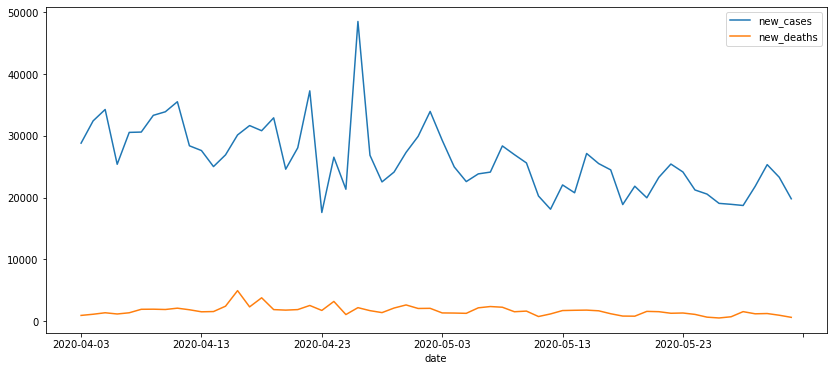

In [64]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


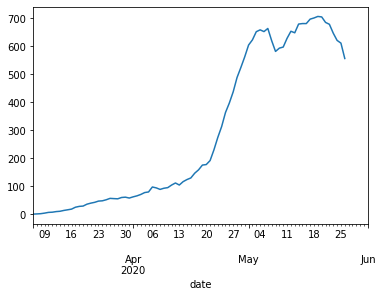

In [66]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [67]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

56163

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [69]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,318.0,1076.0,76553.0,5815.0,82368.0
1,438.0,1516.0,63965.0,7529.0,71494.0
2,350.0,1766.0,-18947.0,7948.0,-10999.0
3,325.0,1130.0,51311.0,6465.0,57776.0
4,309.0,1224.0,81259.0,8198.0,89457.0
5,203.0,1095.0,81125.0,5966.0,87091.0
6,131.0,320.0,88747.0,5695.0,94442.0


# Socrata (San Francisco) Data

In [70]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [73]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

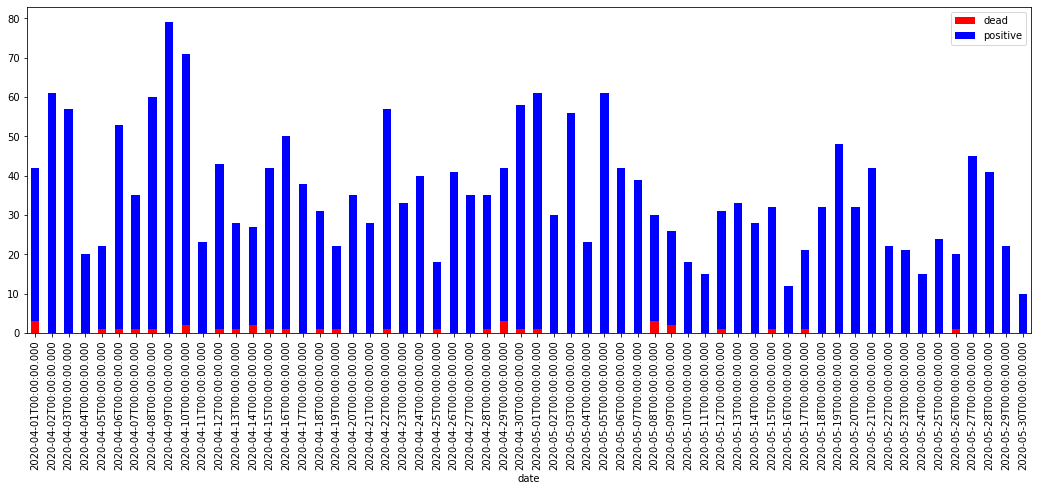

In [77]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

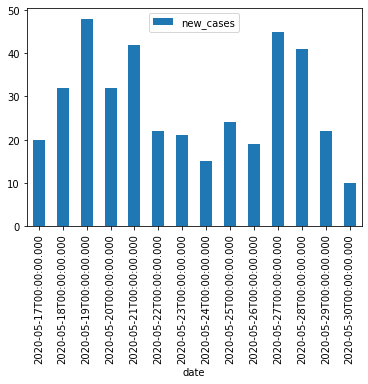

In [78]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

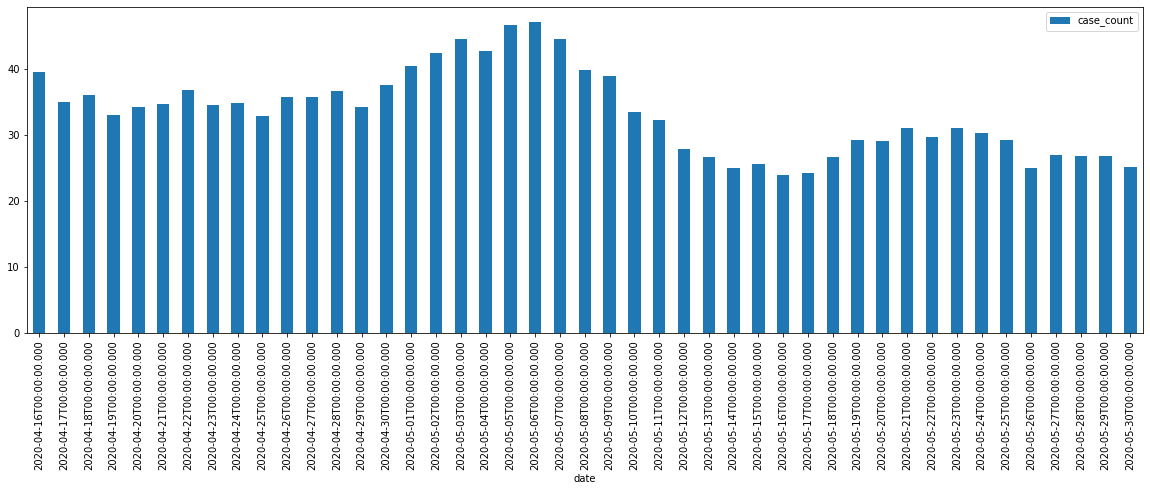

In [79]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [87]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-28,436,14.0,12428.0,52.0,289.0
2020-05-29,450,14.0,12712.0,52.0,305.0
2020-05-30,466,14.0,13186.0,52.0,312.0
2020-05-31,483,14.0,13579.0,52.0,317.0
2020-06-01,501,15.0,13752.0,52.0,330.0


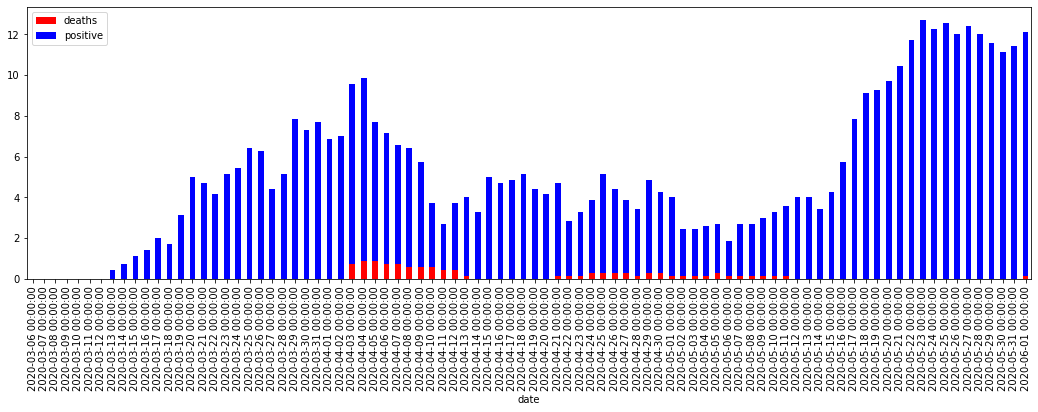

In [88]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [83]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.19%
Marin Population Tested: 5.23%


In [84]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-27    12.428571
2020-05-28    12.000000
2020-05-29    11.571429
2020-05-30    11.142857
2020-05-31    11.428571
Name: positive, dtype: float64

In [85]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-05       NaN
2020-05-06    2603.0
2020-05-07    1799.0
2020-05-08    1898.0
2020-05-09    2049.0
2020-05-10    2119.0
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
2020-05-31    3705.0
2020-06-01    2423.0
Name: positive, dtype: float64